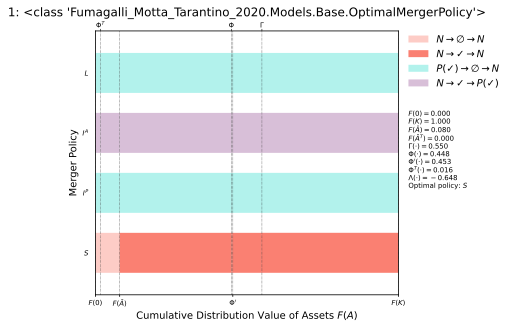

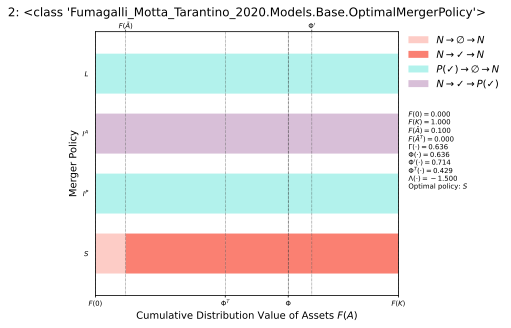

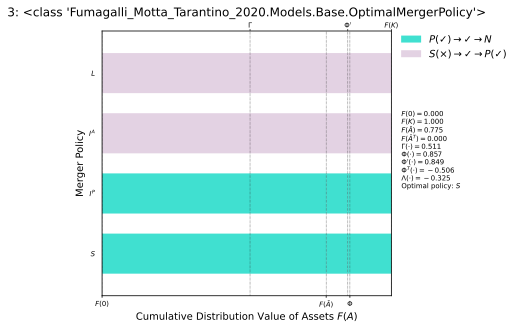

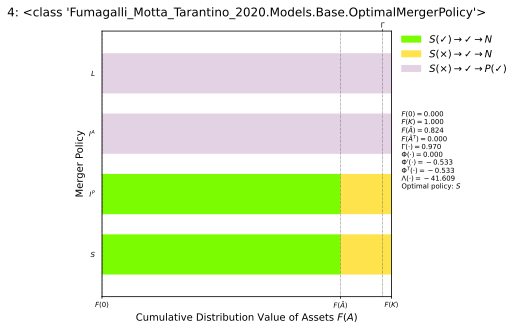

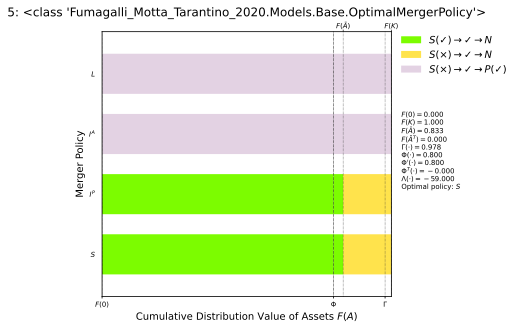

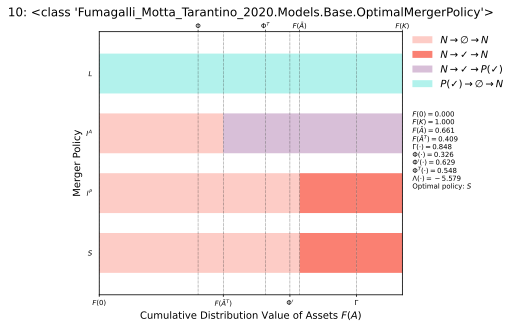

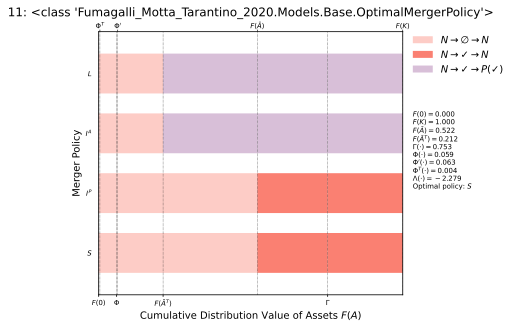

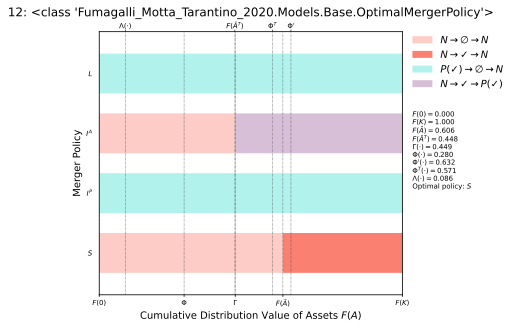

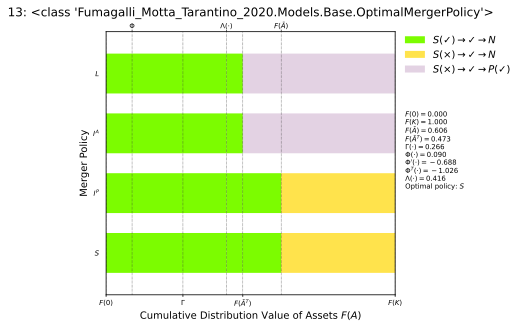

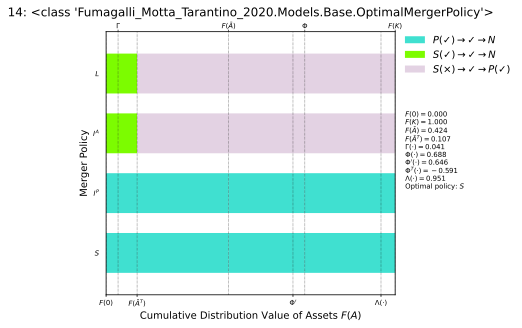

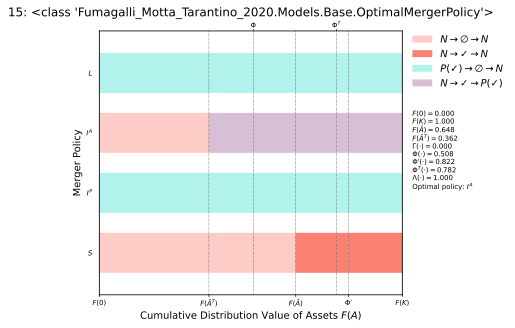

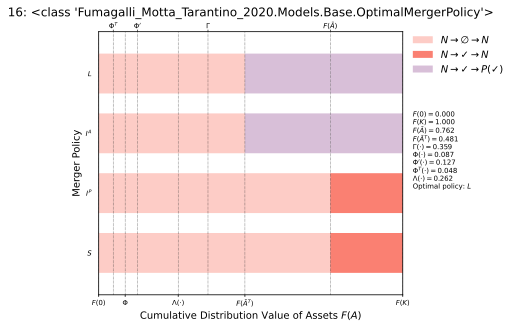

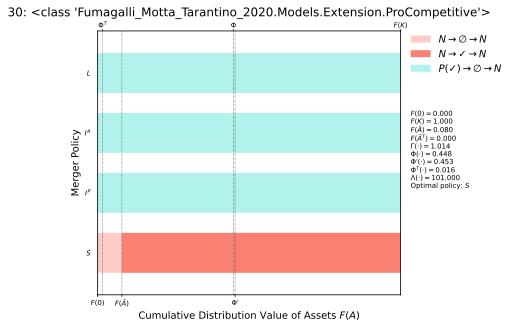

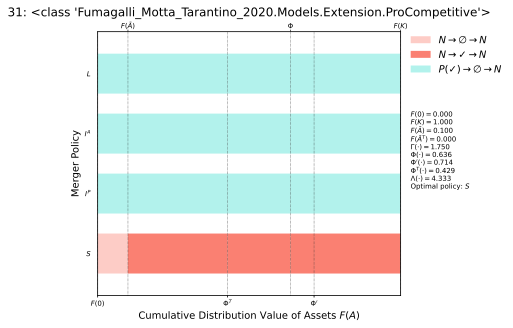

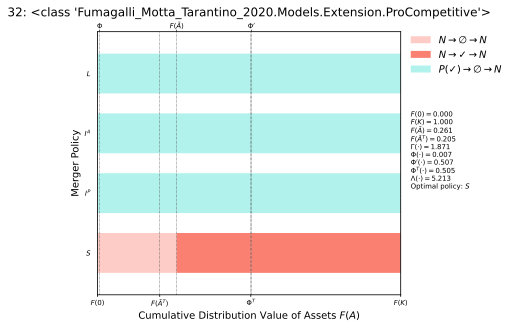

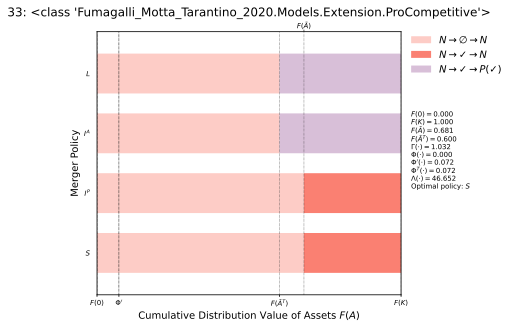

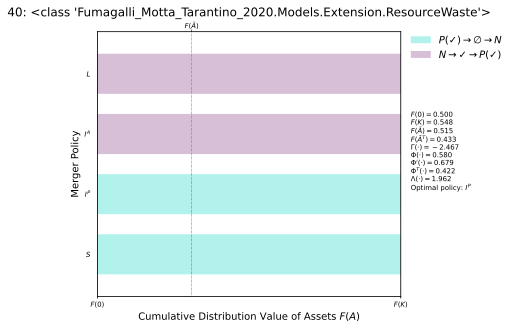

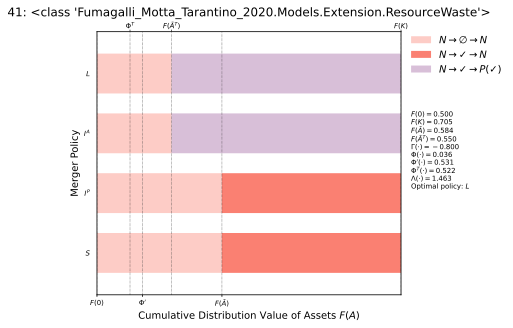

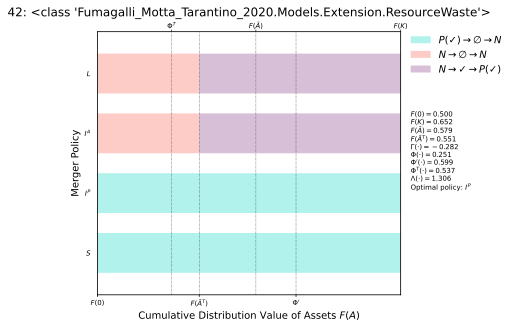

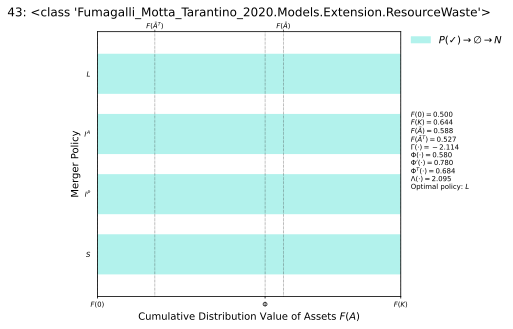

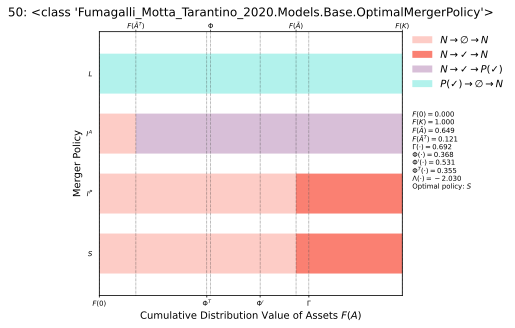

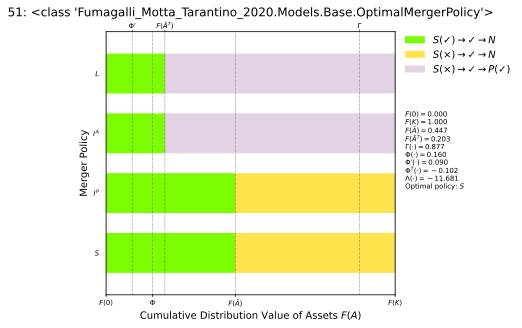

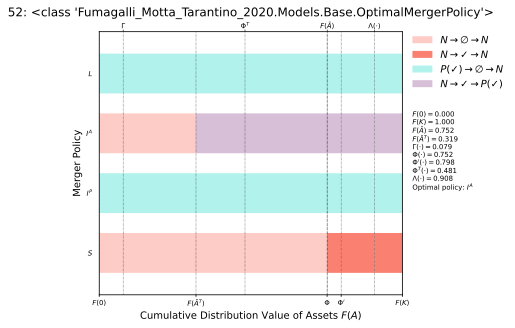

In [1]:
from Fumagalli_Motta_Tarantino_2020.Notebooks.NotebookUtilities import *
import Fumagalli_Motta_Tarantino_2020 as FMT20

%config InlineBackend.figure_format ='svg'

for i in range(1, 55):
    try:
        m = get_model_by_id(i)
        title = str(i) + ": " + str(type(m))
    except FMT20.IDNotAvailableError:
        continue

    v: FMT20.IVisualize = FMT20.MergerPoliciesAssetRange(m)
    v.plot(
        legend=False, thresholds=True, optimal_policy=True, title=title, y_offset=-30
    )